# Промышленность. Построение модели , которая предскажет температуру стали с целью уменьшения потребления электроэнергии на этапе обработки стали компании ООО «Так закаляем сталь» 

## Описание проекта. Цели и задачи

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

**Итак, цель нашей работы: построить модель, которая предскажет температуру стали металлургического комбината ООО «Так закаляем сталь» для оптимизации производственных расходов.**

Задачи работы:

    1. Изучить данные
    2. Составить план работы по итогу изучения данных
    2. предобработать данные
    3. Определить призаки, которые будут использованы для обучения (в тч удалить лишние, добавить новые при необходимости), определить целевой признак
    4. Разделить выборку на тренировочную и тетовую
    5. Используя возможности выбора гиперпараметров, обучить модели
    6. Изучить результаты каждой модели , определить  МАЕ на тестовой выборке лучшей модели.
    7. Поготовить сводный вывод по получившимся результатам.

## Итак, план работы:
   
    1. Изучить данные. Загрузим библиотеки, откроем файлы, изучим аномалии, корреляцию, дубликаты, пропуски
    2. предобработать данные: изменим типы данных, удалим\заменим пропуски, удалим выбросы при необходимости, в случае, если это обосновано
    3. Определить призаки, которые будут использованы для обучения (в тч удалить лишние, добавить новые при необходимости), определить целевой признак
    4. Создать итоговую таблицу, объединив все необходимые таблицы в одну (метод merge inner, тк в тоговую таблицу должны попасть партии , имеющиеся в каждой таблице) 
    5. Разделить выборку на тренировочную и тестовую
    6. Используя кросс-валидацию , выберем лучшие гиперпараметры, обучим модели (RandomForestRegressor, LinearRegression)
    7. Изучить результаты каждой модели , определить  МАЕ на тестовой выборке лучшей модели.
    8. Поготовить сводный вывод по получившимся результатам.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта.-Цели-и-задачи" data-toc-modified-id="Описание-проекта.-Цели-и-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта. Цели и задачи</a></span><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Итак,-план-работы:" data-toc-modified-id="Итак,-план-работы:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Итак, план работы:</a></span></li><li><span><a href="#Изучение-данных-и-их-предобработка" data-toc-modified-id="Изучение-данных-и-их-предобработка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных и их предобработка</a></span><ul class="toc-item"><li><span><a href="#Объединим-все-данные-в-одну-таблицу" data-toc-modified-id="Объединим-все-данные-в-одну-таблицу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объединим все данные в одну таблицу</a></span></li><li><span><a href="#Код-решения" data-toc-modified-id="Код-решения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Код решения</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#LGBMRegressor-на-тестовой-выборке-и-лучшие-параметры" data-toc-modified-id="LGBMRegressor-на-тестовой-выборке-и-лучшие-параметры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor на тестовой выборке и лучшие параметры</a></span></li></ul></li><li><span><a href="#ИТОГОВЫЕ-ВЫВОДЫ.-ОТЧЕТ-ПО-РЕШЕНИЮ" data-toc-modified-id="ИТОГОВЫЕ-ВЫВОДЫ.-ОТЧЕТ-ПО-РЕШЕНИЮ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ИТОГОВЫЕ ВЫВОДЫ. ОТЧЕТ ПО РЕШЕНИЮ</a></span></li></ul></div>

## Изучение данных и их предобработка

In [1]:
!pip install catboost
!pip install lightgbm

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.pipeline import  make_pipeline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer, r2_score
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

RND = 250722

**1. Изучим данные об электродах**

In [3]:
def fun_date(data):
    display ('**Общая информация датафрейма**')
    display(data.info())
    print(' ')
    display('**Просмотр статистических данных**')
    display(data.describe())
    print(' ')
    display('**Вывод первых пяти строк датафрейма**')
    display(data.head())
    print(' ')
    display('**Вывод количесва дубликатов датафрейма**')
    display(data.duplicated().sum())
    print(' ')
    display('**Вывод количесва пропущеных значений датафрейма**')
    display(data.isnull().sum())
    print(' ')
    display(data.describe(include= 'all').T)
    print(' ')
    display('**Корреляция признаков**')
    display(sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, linewidths=6.5,fmt='.2g'));

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

'**Просмотр статистических данных**'

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


'**Вывод первых пяти строк датафрейма**'

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,14876.0,NaN,NaN,NaN,1615.220422,934.571502,1.0,806.0,1617.0,2429.0,3241.0
Начало нагрева дугой,14876,14875,2019-06-10 22:02:03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Конец нагрева дугой,14876,14876,2019-05-03 11:06:02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Активная мощность,14876.0,NaN,NaN,NaN,0.670441,0.408159,0.030002,0.395297,0.555517,0.857034,3.731596
Реактивная мощность,14876.0,NaN,NaN,NaN,0.452592,5.878702,-715.504924,0.290991,0.415962,0.637371,2.676388


'**Корреляция признаков**'

<AxesSubplot:>

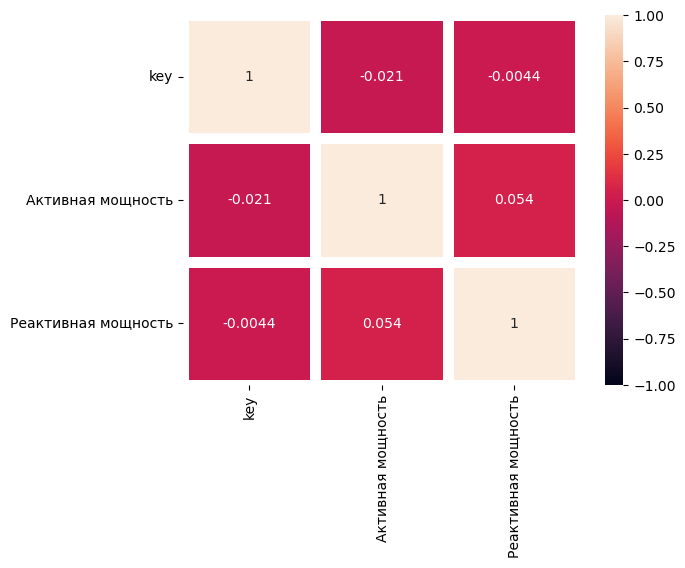

In [4]:
df_arc=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_arc.csv')
fun_date(df_arc)

In [5]:
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')

Итак, мы изучили данные. Сразу видим, что тип "Начало нагрева дугой"и "Конец нагрева дугой"  - object . Поэтому перевели их в формат дат. Пропусков и дубликатов нет. В столбце "Реактивная мощность" видим выброс -715 - значение отрицательное, чего быть не может. Найдем номер партии данного выброса и удалим его, поскольку он только один.

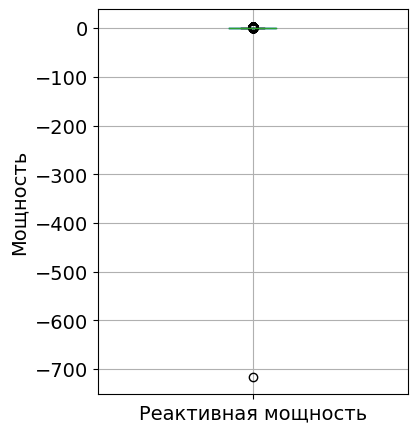

In [6]:
df_arc.boxplot(['Реактивная мощность'], figsize=(4,5), fontsize=14)
plt.ylabel("Мощность", fontsize=14)
plt.show()

In [7]:
df_arc[df_arc['Реактивная мощность'] <=0].value_counts()

key   Начало нагрева дугой  Конец нагрева дугой  Активная мощность  Реактивная мощность
2116  2019-07-24 00:44:48   2019-07-24 00:46:37  0.495782           -715.504924            1
dtype: int64

In [8]:
df_arc=df_arc.loc[df_arc['key'] !=2116]

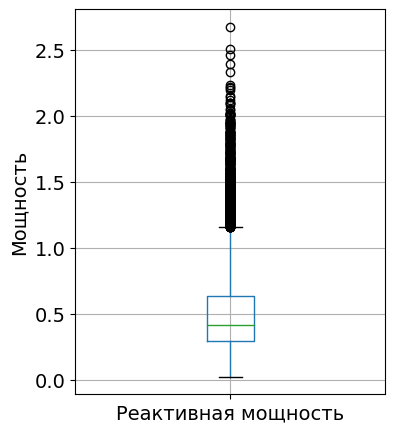

In [9]:
df_arc.boxplot(['Реактивная мощность'], figsize=(4,5), fontsize=14)
plt.ylabel("Мощность", fontsize=14)
plt.show()

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14872 non-null  int64         
 1   Начало нагрева дугой  14872 non-null  datetime64[ns]
 2   Конец нагрева дугой   14872 non-null  datetime64[ns]
 3   Активная мощность     14872 non-null  float64       
 4   Реактивная мощность   14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


None

'**Просмотр статистических данных**'

,key,Активная мощность,Реактивная мощность
count,14872.000000,14872.000000,14872.000000
mean,1615.085732,0.670497,0.500763
std,934.661090,0.408195,0.310897
min,1.000000,0.030002,0.020806
25%,806.000000,0.395297,0.291008
50%,1616.000000,0.555588,0.416280
75%,2429.000000,0.857121,0.637476
max,3241.000000,3.731596,2.676388


'**Вывод первых пяти строк датафрейма**'

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
key,14872.0,NaN,NaT,NaN,NaT,NaT,1615.085732,934.66109,1.0,806.0,1616.0,2429.0,3241.0
Начало нагрева дугой,14872,14871,2019-06-10 22:02:03,2,2019-05-03 11:02:14,2019-09-01 04:34:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Конец нагрева дугой,14872,14872,2019-05-03 11:06:02,1,2019-05-03 11:06:02,2019-09-01 04:36:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Активная мощность,14872.0,NaN,NaT,NaN,NaT,NaT,0.670497,0.408195,0.030002,0.395297,0.555588,0.857121,3.731596
Реактивная мощность,14872.0,NaN,NaT,NaN,NaT,NaT,0.500763,0.310897,0.020806,0.291008,0.41628,0.637476,2.676388


'**Корреляция признаков**'

<AxesSubplot:>

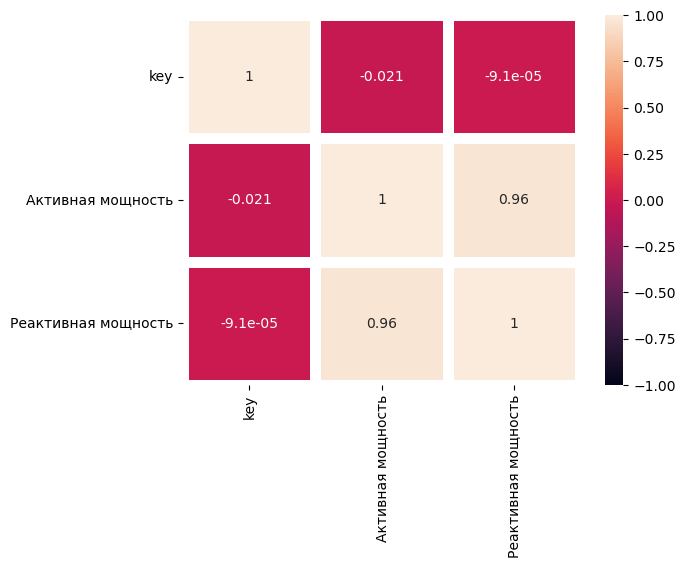

In [10]:
fun_date(df_arc)

Видим, что есть сильная корреляция между Активной и Реактивной мощностями 0,96. Уберем данные столбцы, введем 2 новых признака: Общая мощность и Работа

In [11]:
df_arc['Общая мощность'] = (df_arc['Активная мощность']**2 + df_arc['Реактивная мощность']**2) ** 0.5
time = (df_arc['Конец нагрева дугой']- df_arc['Начало нагрева дугой']).dt.total_seconds()
df_arc['Работа'] = time * df_arc['Общая мощность']

In [12]:
df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Общая мощность,Работа
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,272.149755
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,177.416785
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,154.118502
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,719.221394
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,119.471318
...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648,100.581755
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559,154.000682
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560,160.919002
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489,15.075853


In [13]:
#Определим количество итераций нагрева
df_arc_count = df_arc.groupby(by = 'key', as_index = False).count()[['key','Начало нагрева дугой']]
df_arc_count.columns = ['key','Количество итераций нагрева']
#df_arc_count.head(3)
#сгруппируем по партиям
df_arc = df_arc.groupby(by = 'key', as_index = False).sum()
df_arc = df_arc.merge(df_arc_count, how='left', on = 'key')

In [14]:
#df_arc= df_arc.groupby('key').mean(['Общая мощность', 'Работа'] )
df_arc= df_arc.groupby('key').mean(['Общая мощность'] )
df_arc= df_arc.groupby('key').sum(['Работа'])

df_arc = df_arc.drop(columns = ['Активная мощность', 'Реактивная мощность'], axis = 1)

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Общая мощность               3213 non-null   float64
 1   Работа                       3213 non-null   float64
 2   Количество итераций нагрева  3213 non-null   float64
dtypes: float64(3)
memory usage: 100.4 KB


None

'**Просмотр статистических данных**'

,Общая мощность,Работа,Количество итераций нагрева
count,3213.000000,3213.000000,3213.000000
mean,3.882675,893.983458,4.628696
std,1.740078,642.839169,1.608860
min,0.257637,15.158096,1.000000
25%,2.677078,447.317516,4.000000
50%,3.752402,761.762620,4.000000
75%,4.858580,1161.474644,6.000000
max,21.564771,10630.980668,16.000000


'**Вывод первых пяти строк датафрейма**'

,Общая мощность,Работа,Количество итераций нагрева
key,,,
1,5.826395,1442.377754,5.0
2,3.649216,881.233565,4.0
3,2.989534,525.066777,5.0
4,3.814962,796.911309,4.0
5,4.035758,1199.137958,4.0


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

Общая мощность                 0
Работа                         0
Количество итераций нагрева    0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
Общая мощность,3213.0,3.882675,1.740078,0.257637,2.677078,3.752402,4.858580,21.564771
Работа,3213.0,893.983458,642.839169,15.158096,447.317516,761.762620,1161.474644,10630.980668
Количество итераций нагрева,3213.0,4.628696,1.608860,1.000000,4.000000,4.000000,6.000000,16.000000


'**Корреляция признаков**'

<AxesSubplot:>

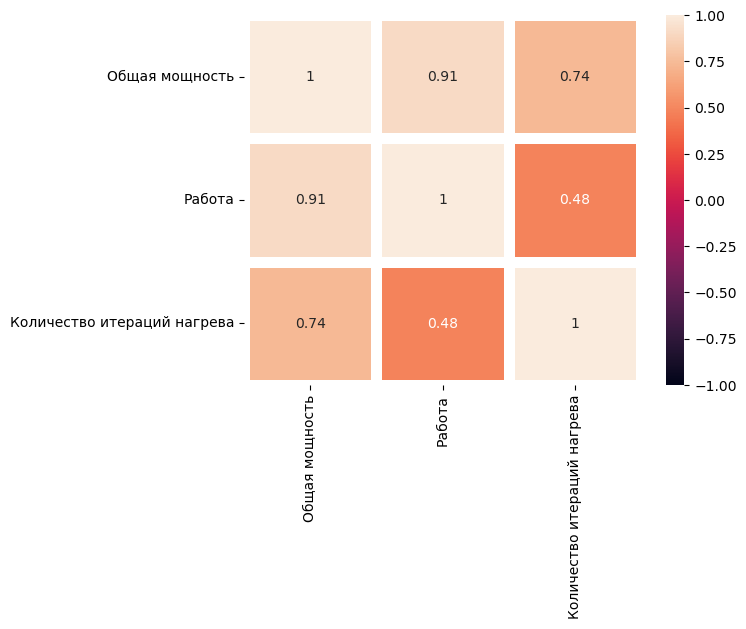

In [15]:
fun_date(df_arc)

**Вывод:**
Т.о., мы изучили данные об электродах. Определили, что пропусков и дубликатов нет, корреляции между признаками нет. Изменили тип данных "Начало нагрева дугой" и "Конец нагрева дугой» на формат даты. Удалили выброc в реактивной мощности (весь номер партии с отрицательным значением мощности). Вместо столбцов "активная" и "реактивная" мощности, ввели 2 новых признака: Общая мощность (определяется как корень квадратов двух мощностей) и Работа (определяется как время нагрева дугой на общую мощность). Взяли среднее значение Общей мощности, а Работу суммировали для каждой партии. Поскольку Общая мощность и работа имеют высокую корреляцию (коэффициент корреляции 0,91), Общую мощность решено удалить для более качественного обучения моделей. Также посчитали количество интераций нагрева каждой партии.

**2. Изучим данные о подаче сыпучих материалов (объём)**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

'**Просмотр статистических данных**'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


'**Вывод первых пяти строк датафрейма**'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.00,1622.0,2431.00,3241.0
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0


'**Корреляция признаков**'

<AxesSubplot:>

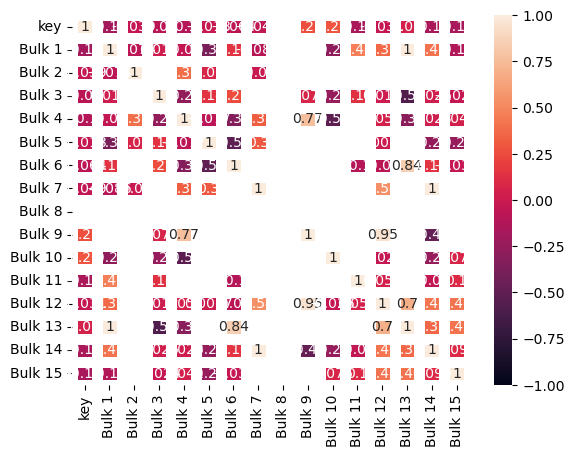

In [16]:
df_bulk=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_bulk.csv')
fun_date(df_bulk)

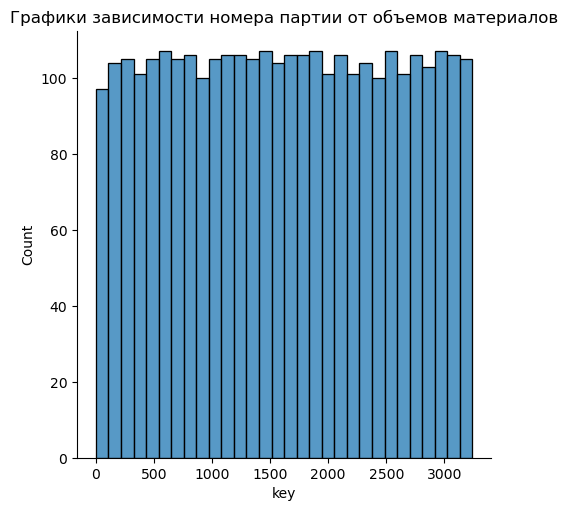

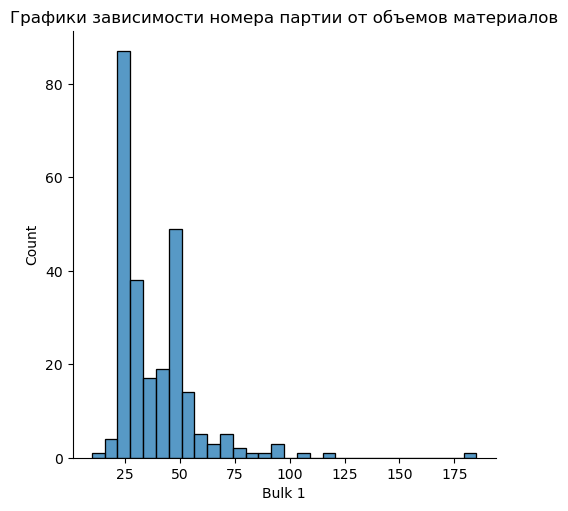

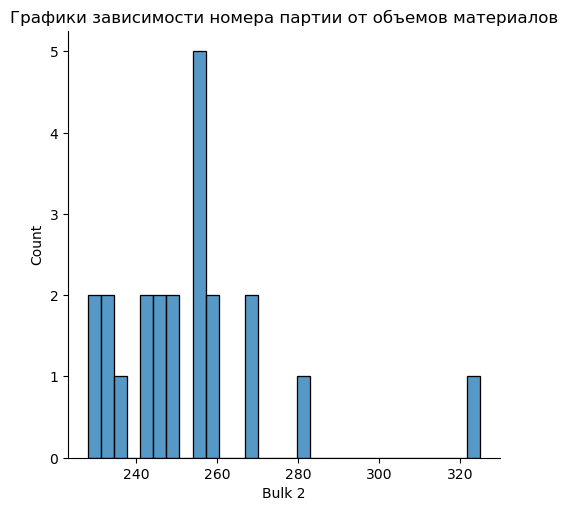

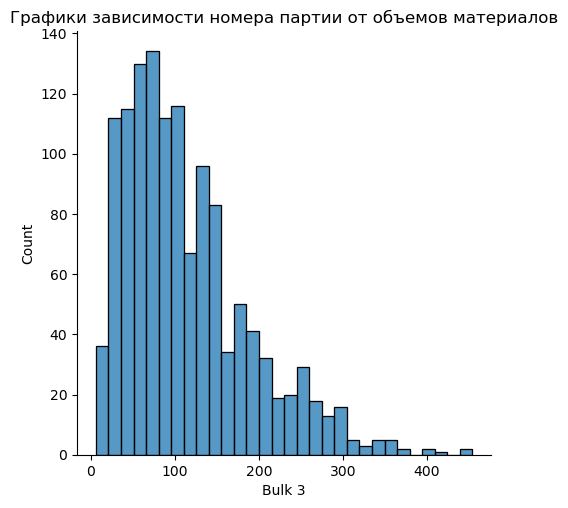

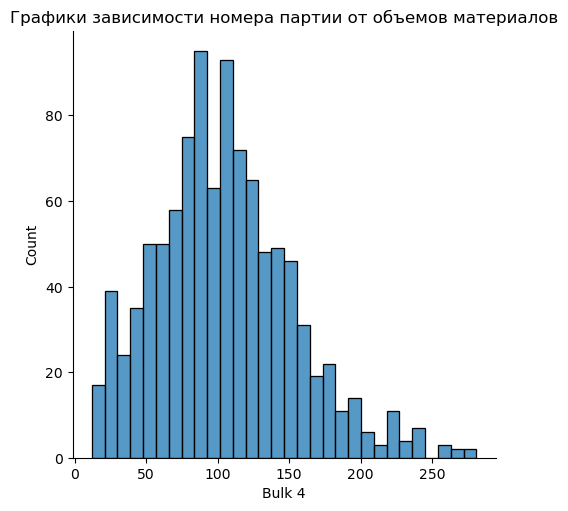

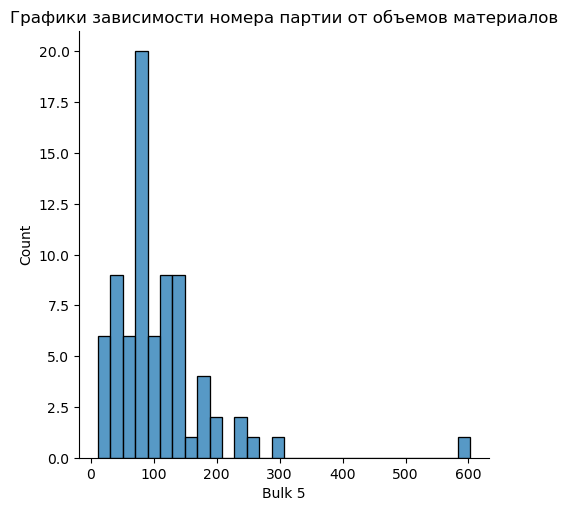

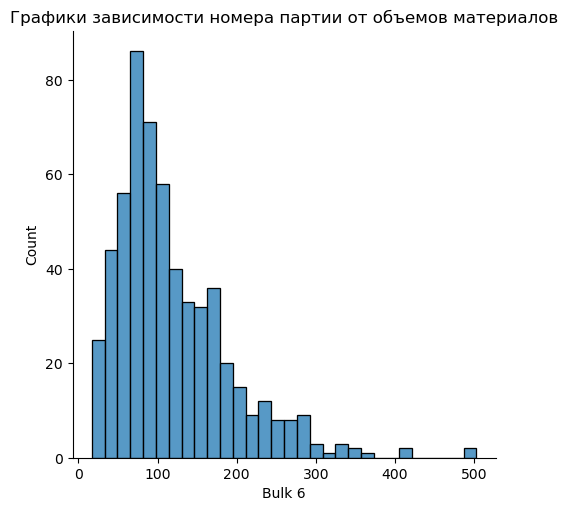

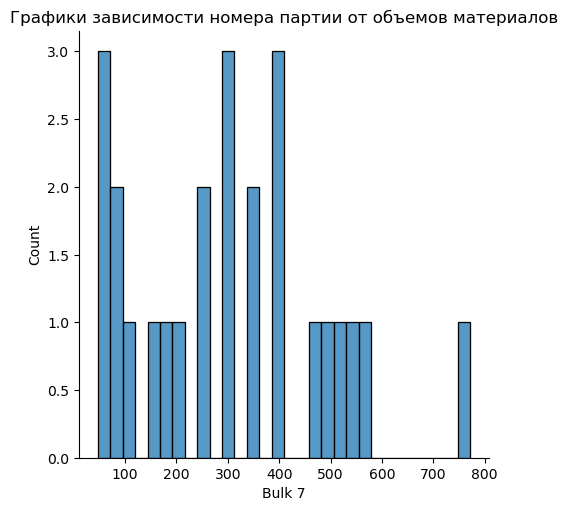

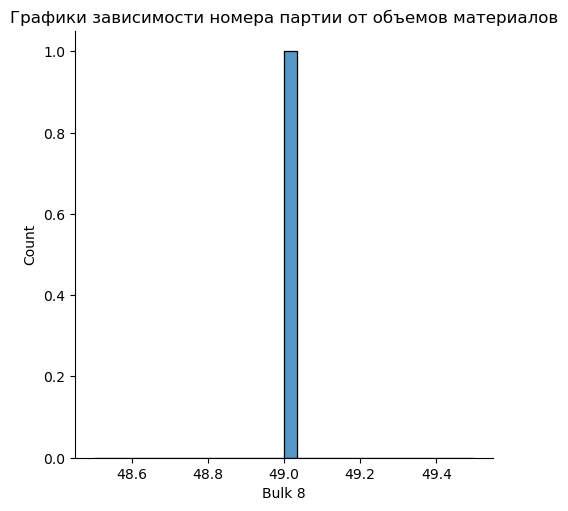

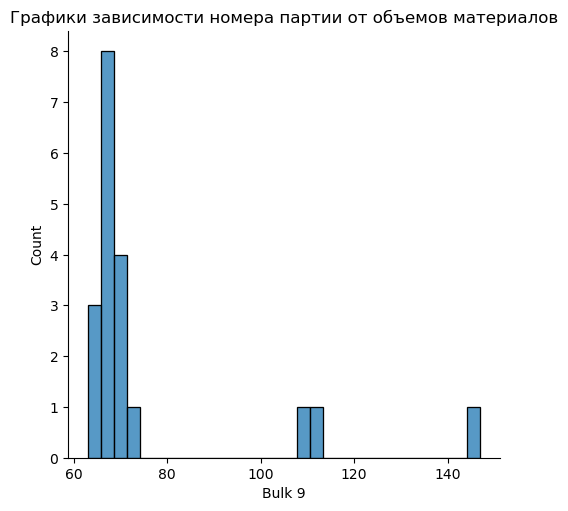

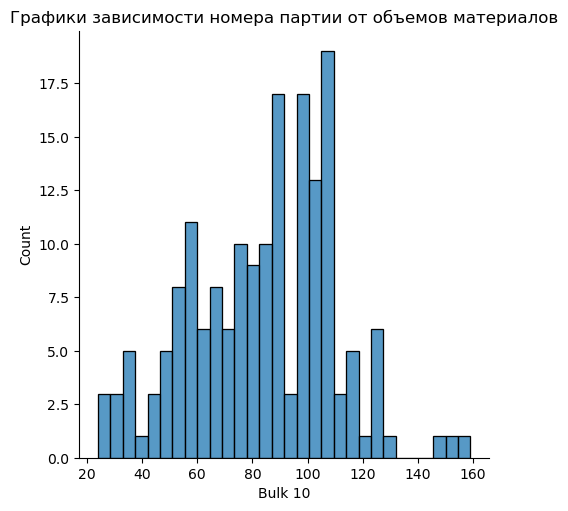

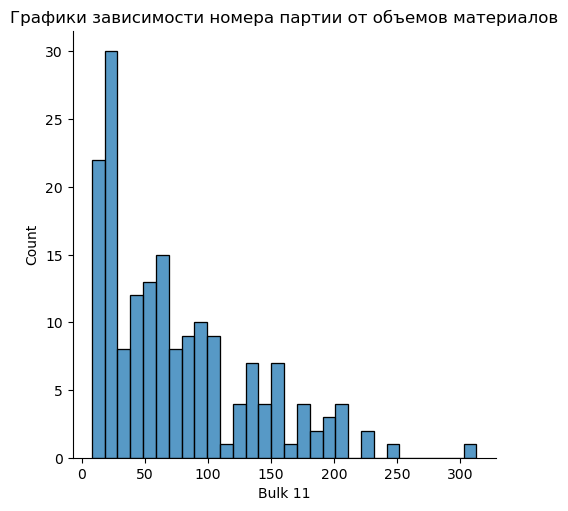

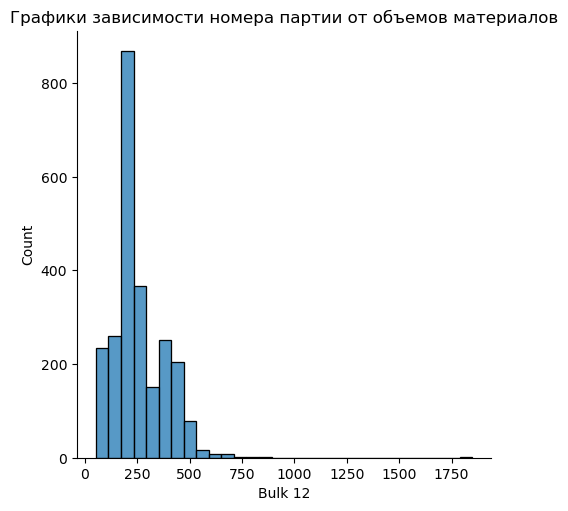

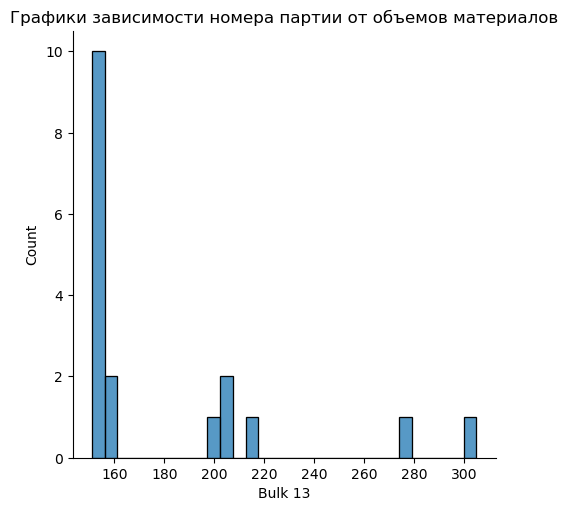

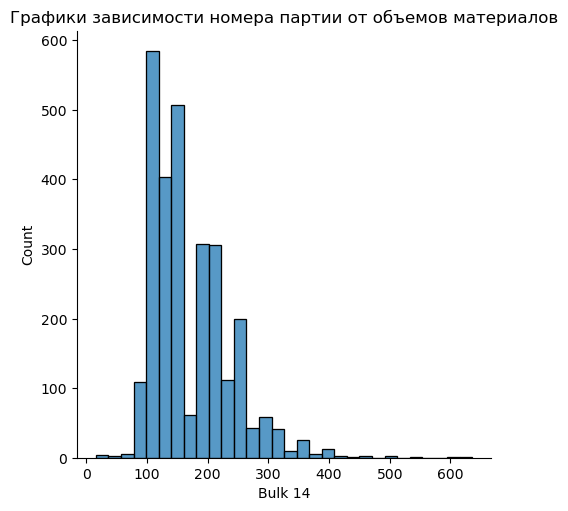

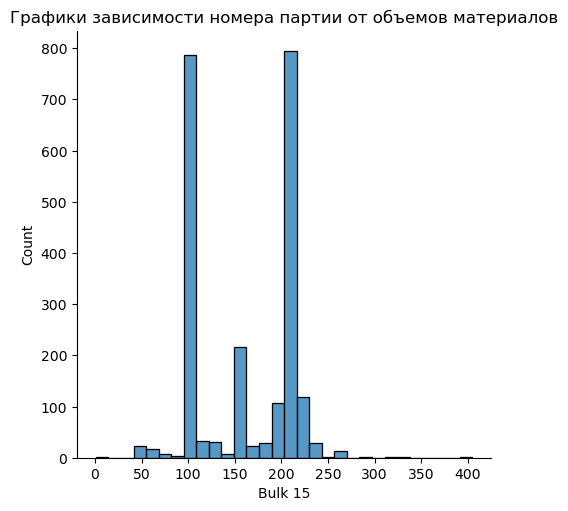

In [17]:
for a in df_bulk.columns:
    fig = sns.displot(df_bulk[a],bins=30)
    plt.title('Графики зависимости номера партии от объемов материалов', fontweight='normal')

In [18]:
df_bulk = df_bulk.fillna(0)

In [19]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 2   3129 non-null   float64
 3   Bulk 3   3129 non-null   float64
 4   Bulk 4   3129 non-null   float64
 5   Bulk 5   3129 non-null   float64
 6   Bulk 6   3129 non-null   float64
 7   Bulk 7   3129 non-null   float64
 8   Bulk 8   3129 non-null   float64
 9   Bulk 9   3129 non-null   float64
 10  Bulk 10  3129 non-null   float64
 11  Bulk 11  3129 non-null   float64
 12  Bulk 12  3129 non-null   float64
 13  Bulk 13  3129 non-null   float64
 14  Bulk 14  3129 non-null   float64
 15  Bulk 15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Итак, видим пропуске в некоторых видах сыпучмх материалов. Это значит, что в каких-то сплах они не участвовали. Согласно графикам, каждый из материалов регулярно участвует в производственном процессе. Поскольку каждый сплав имеет свой специфический состав, считаем, что складывать их неправильно. Оставляем как есть. Пропуски заполнили нулями, тк значит, что в данные партии те или иные сыпучие вещества не поступали.

**3. Изучим данные о подаче сыпучих материалов (время)**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

'**Просмотр статистических данных**'

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


'**Вывод первых пяти строк датафрейма**'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,3129.0,NaN,NaN,NaN,1624.383509,933.337642,1.0,816.0,1622.0,2431.0,3241.0
Bulk 1,252,252,2019-05-03 17:50:19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 2,22,22,2019-05-07 08:36:19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 3,1298,1298,2019-05-03 20:13:36,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 4,1014,1014,2019-05-03 11:21:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 5,77,77,2019-05-07 08:36:19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 6,576,576,2019-05-03 18:52:57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 7,25,25,2019-05-07 11:37:42,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 8,1,1,2019-07-05 17:46:11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 9,19,19,2019-05-14 00:04:56,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'**Корреляция признаков**'

<AxesSubplot:>

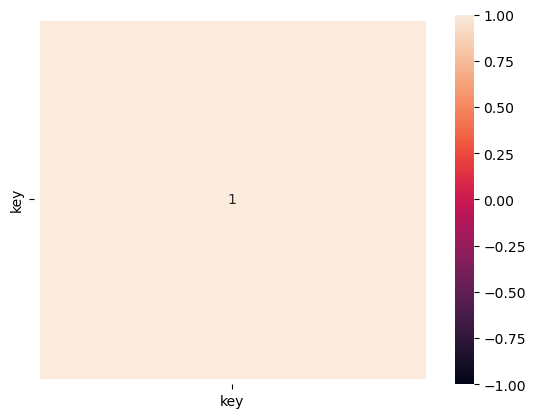

In [20]:
df_bulk_t=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_bulk_time.csv')
fun_date(df_bulk_t) 

In [21]:
for b in df_bulk_t.columns:
    df_bulk_t[b]= pd.to_datetime(df_bulk_t[b], format='%Y-%m-%dT%H:%M:%S')
    print(b)
    print(df_bulk_t[b].min())
    print(df_bulk_t[b].max())

key
1970-01-01 00:00:00.000000001
1970-01-01 00:00:00.000003241
Bulk 1
2019-05-03 17:50:19
2019-08-30 23:01:32
Bulk 2
2019-05-07 08:36:19
2019-08-08 17:34:38
Bulk 3
2019-05-03 20:13:36
2019-08-31 23:39:11
Bulk 4
2019-05-03 11:21:30
2019-08-30 17:36:30
Bulk 5
2019-05-07 08:36:19
2019-08-28 09:01:08
Bulk 6
2019-05-03 18:52:57
2019-09-01 03:12:40
Bulk 7
2019-05-07 11:37:42
2019-08-31 07:22:25
Bulk 8
2019-07-05 17:46:11
2019-07-05 17:46:11
Bulk 9
2019-05-14 00:04:56
2019-08-11 15:09:33
Bulk 10
2019-05-06 01:36:24
2019-08-30 01:30:42
Bulk 11
2019-05-05 16:45:05
2019-08-31 16:00:49
Bulk 12
2019-05-03 11:03:52
2019-09-01 01:39:41
Bulk 13
2019-05-05 00:39:35
2019-08-26 20:31:16
Bulk 14
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 15
2019-05-03 11:03:52
2019-09-01 04:05:34


In [22]:
df_bulk_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   datetime64[ns]
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](16)
memory usage: 391.2 KB


Итак, поменяли типы данных в датах, существенных аномалий в датах не выявлено, все выглядит логично. Но тк время в нашей работе для анализа нам не нужно , производится анализ не временных рядов, данную таблицу далее использовать не будем.

**4. Изучим данные о продувке сплава газом**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

'**Просмотр статистических данных**'

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


'**Вывод первых пяти строк датафрейма**'

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key      0
Газ 1    0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
Газ 1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


'**Корреляция признаков**'

<AxesSubplot:>

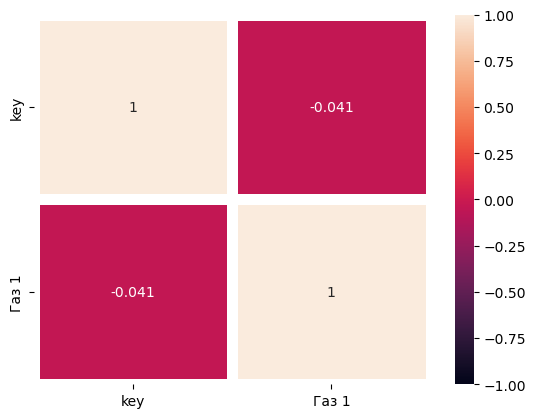

In [23]:
df_gas=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_gas.csv')
fun_date(df_gas)

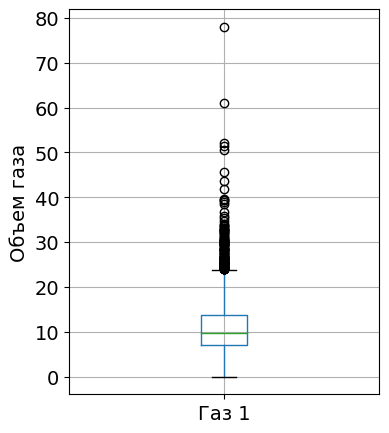

In [24]:
df_gas.boxplot(['Газ 1'], figsize=(4,5), fontsize=14)
plt.ylabel("Объем газа", fontsize=14)
plt.show()

Т.о., пропусков, выбросов, дубликатов нет.

**5. Изучим данные о результатах измерения температуры**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

'**Просмотр статистических данных**'

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


'**Вывод первых пяти строк датафрейма**'

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key                0
Время замера       0
Температура     2901
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,15907.0,NaN,NaN,NaN,1607.88087,942.212073,1.0,790.0,1618.0,2427.0,3241.0
Время замера,15907,15907,2019-05-03 11:16:18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Температура,13006.0,NaN,NaN,NaN,1591.84092,21.375851,1191.0,1581.0,1591.0,1601.0,1705.0


'**Корреляция признаков**'

<AxesSubplot:>

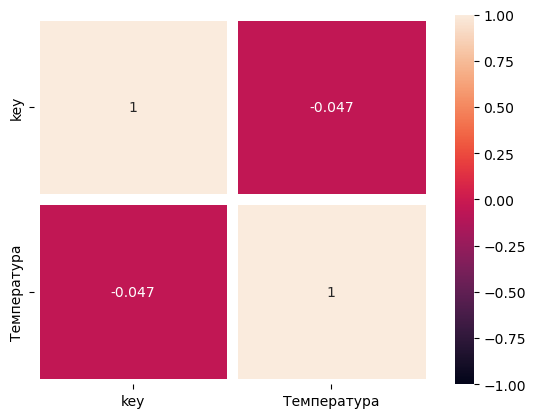

In [25]:
df_temp=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_temp.csv')
fun_date(df_temp)

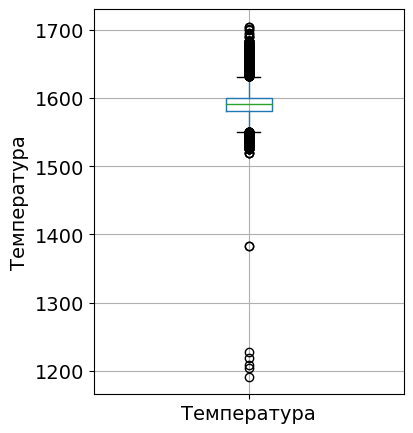

In [26]:
df_temp.boxplot(['Температура'], figsize=(4,5), fontsize=14)
plt.ylabel("Температура", fontsize=14)
plt.show()

In [27]:
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
df_temp = df_temp.dropna(subset=['Температура']).reset_index(drop=True)

In [29]:
df_temp.shape

(13006, 3)

In [30]:
t= df_temp.groupby(by = 'key', as_index=False).count()
t.columns =['key','v', 't']

In [31]:
t

,key,v,t
0,1,5,5
1,2,6,6
2,3,5,5
3,4,3,3
4,5,2,2
...,...,...,...
3211,3237,1,1
3212,3238,1,1
3213,3239,1,1
3214,3240,1,1


In [32]:
df_temp=df_temp.merge(t, how='left', on = 'key')
df_temp

,key,Время замера,Температура,v,t
0,1,2019-05-03 11:16:18,1571.0,5,5
1,1,2019-05-03 11:25:53,1604.0,5,5
2,1,2019-05-03 11:29:11,1618.0,5,5
3,1,2019-05-03 11:30:01,1601.0,5,5
4,1,2019-05-03 11:30:39,1613.0,5,5
...,...,...,...,...,...
13001,3237,2019-08-31 22:44:04,1569.0,1,1
13002,3238,2019-08-31 23:30:31,1584.0,1,1
13003,3239,2019-09-01 01:31:47,1598.0,1,1
13004,3240,2019-09-01 02:39:01,1617.0,1,1


In [33]:
df_temp=df_temp.query('v != 1')

In [34]:
df_temp=df_temp.drop(['v','t'], axis=1)

In [35]:
df_temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [36]:
df_temp.shape

(12265, 3)

In [37]:
df_temp= df_temp.groupby(by ='key').agg(['first', 'last']).reset_index()
df_temp.head(10)

key        Время замера                     Температура        
                    first                last       first    last
0   1 2019-05-03 11:16:18 2019-05-03 11:30:39      1571.0  1613.0
1   2 2019-05-03 11:37:27 2019-05-03 11:59:12      1581.0  1602.0
2   3 2019-05-03 12:13:17 2019-05-03 12:34:57      1596.0  1599.0
3   4 2019-05-03 12:52:57 2019-05-03 12:59:25      1601.0  1625.0
4   5 2019-05-03 13:23:19 2019-05-03 13:36:01      1576.0  1602.0
5   6 2019-05-03 13:49:24 2019-05-03 14:12:29      1543.0  1596.0
6   7 2019-05-03 14:19:43 2019-05-03 14:42:37      1586.0  1599.0
7   8 2019-05-03 15:07:18 2019-05-03 15:22:52      1577.0  1598.0
8   9 2019-05-03 15:37:03 2019-05-03 16:01:16      1587.0  1592.0
9  10 2019-05-03 16:14:29 2019-05-03 16:36:08      1574.0  1593.0

Итак,

Мы привели дату в корректный формат даты, пропуски Температуры удалили, т к корректное заполнение их не считается возможным.
Посмотрели выбросы. Согласно данным заказчика, удалять и корректировать их не нужно.

Тк согласно заданию, наш целевой признак -конечная температура , для обучения модели в качестве одной из фичей нам необходима первичная, поэтому мы сгруппировали данные соответствующим образом. Если замер был осуществен только 1 раз, такие данные для обучения не подходят, и они были удалены. 

**6. Изучим данные о проволочных материалах (объём)**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

'**Просмотр статистических данных**'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


'**Вывод первых пяти строк датафрейма**'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.000000,823.000000,1619.000000,2434.000000,3241.000000
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442842,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


'**Корреляция признаков**'

<AxesSubplot:>

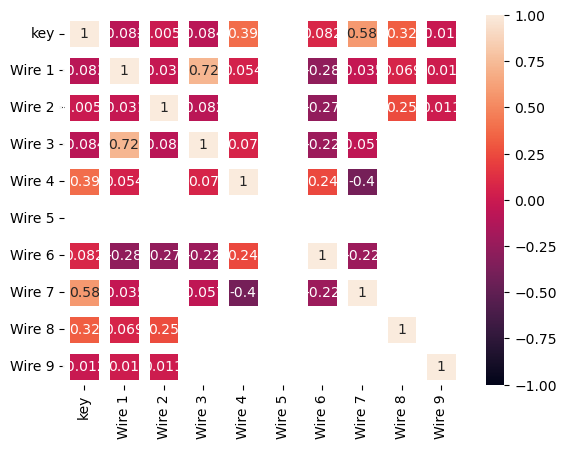

In [38]:
df_wire=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_wire.csv')
fun_date(df_wire)

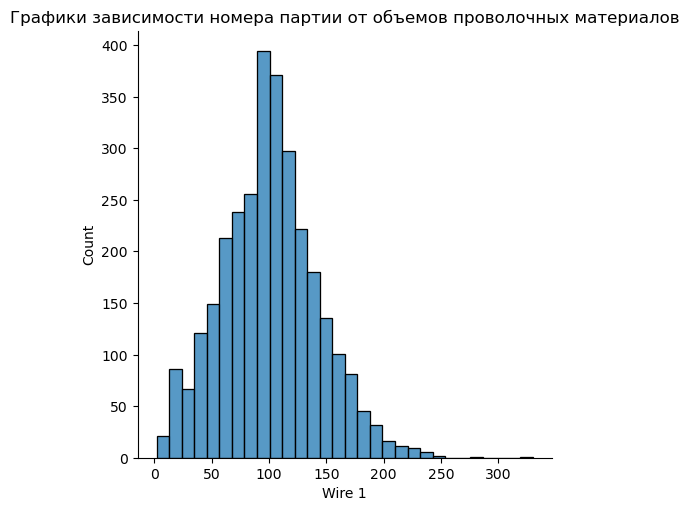

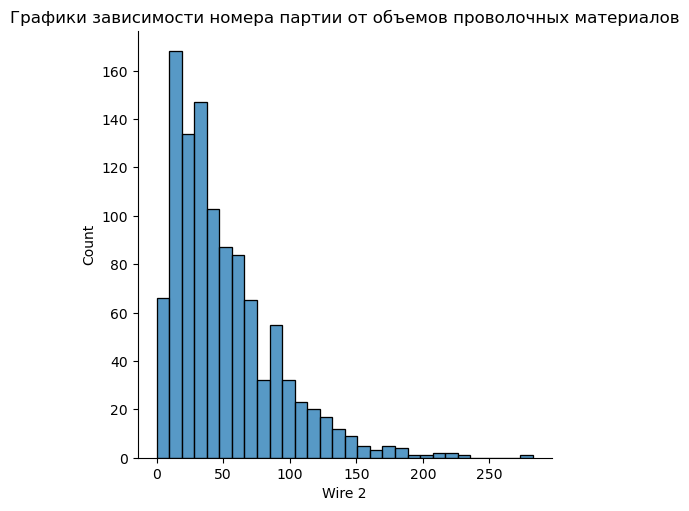

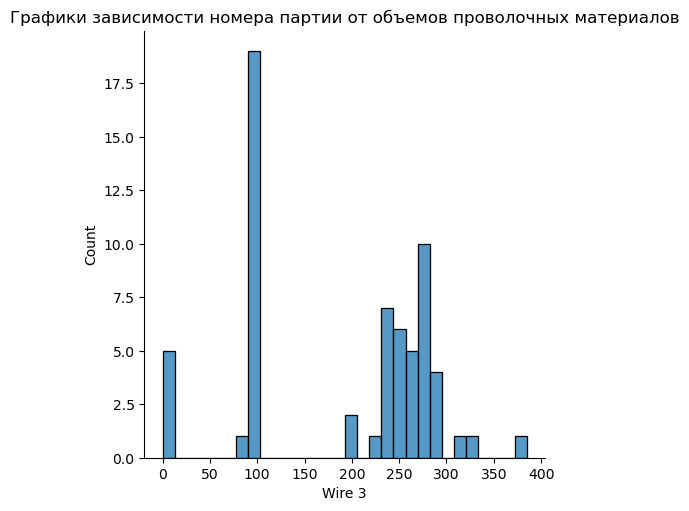

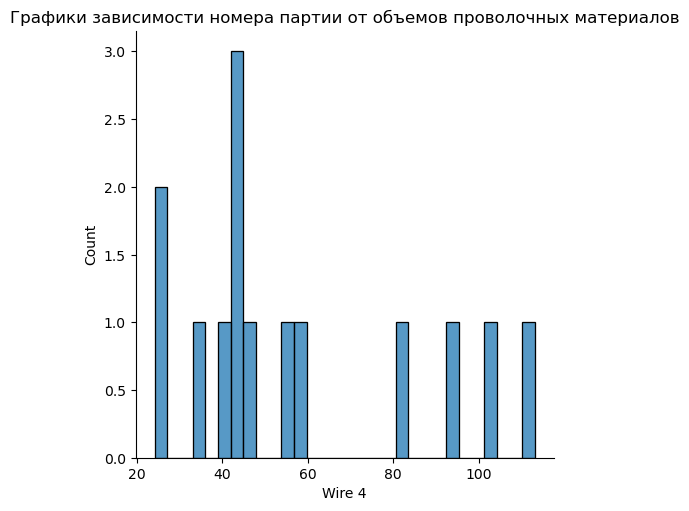

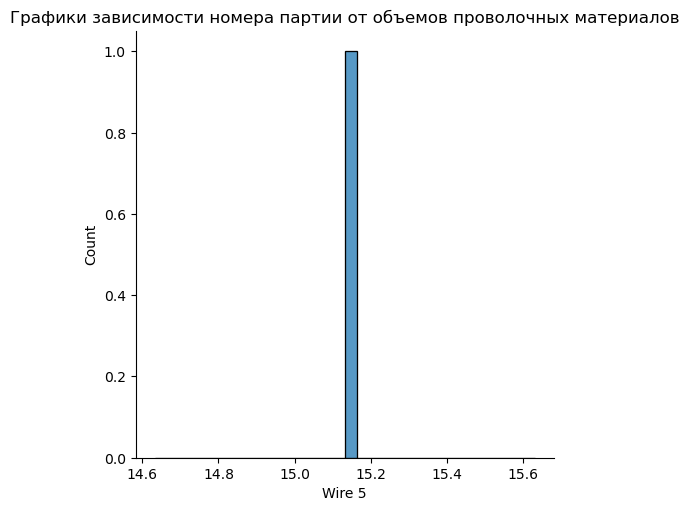

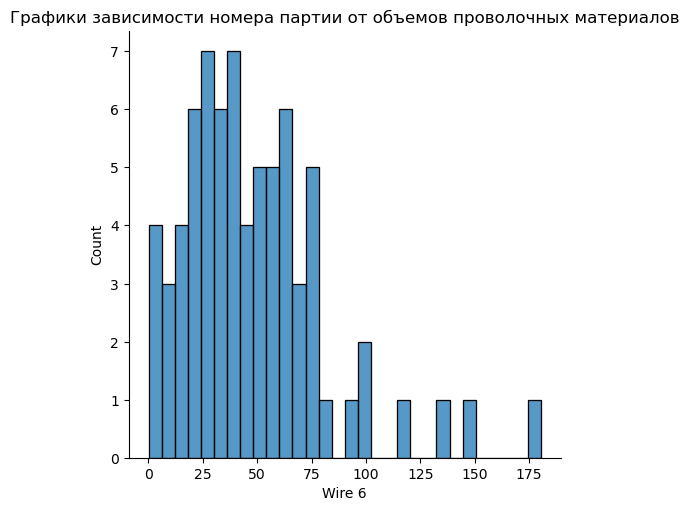

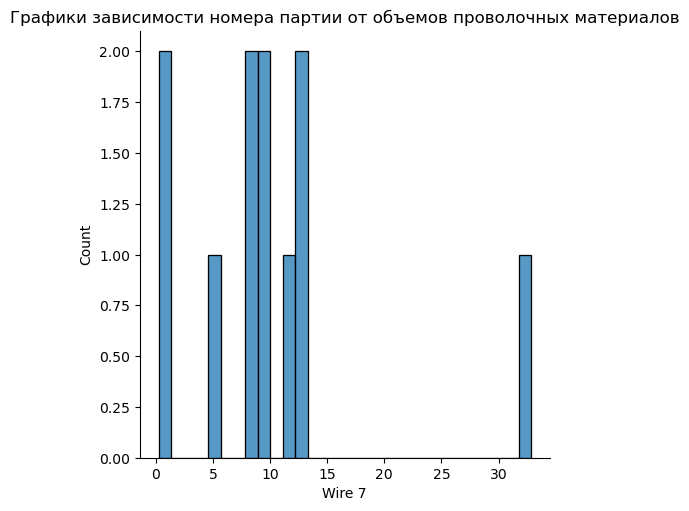

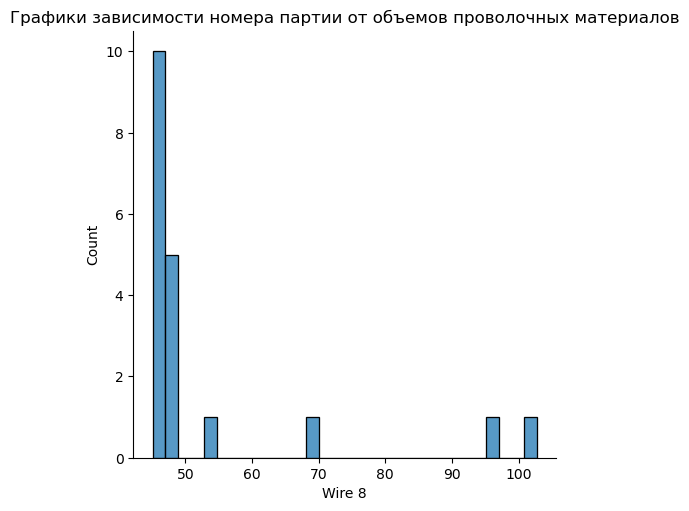

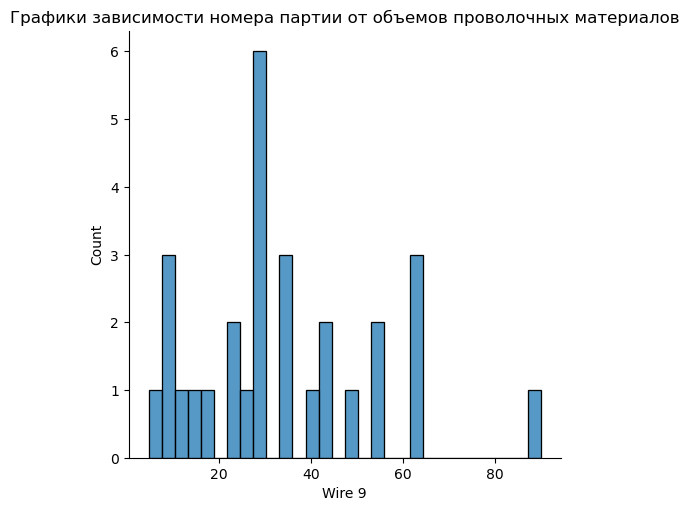

In [39]:
for c in df_wire.columns[1:]:
    fig = sns.displot(df_wire[c],bins=30)
    plt.title('Графики зависимости номера партии от объемов проволочных материалов', fontweight='normal')

In [40]:
df_wire=df_wire.fillna(0)

In [41]:
df_wire[df_wire['Wire 5'] !=0].value_counts()

key   Wire 1    Wire 2  Wire 3     Wire 4  Wire 5  Wire 6     Wire 7  Wire 8  Wire 9
2567  18.30192  0.0     96.288193  0.0     15.132  73.307526  0.0     0.0     0.0       1
dtype: int64

In [42]:
#df_wire=df_wire[df_wire['key'] !=2567] 
df_wire=df_wire.drop(columns = ['Wire 5'], axis = 1)

In [43]:
df_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,1623.426485,100.044411,17.712733,3.874524,0.261019,1.137695,0.035842,0.330697,0.321492
std,932.996726,42.841120,33.517734,30.310417,4.293865,8.958111,0.774190,4.392677,3.806904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,823.000000,70.281120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1619.000000,100.114563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2434.000000,125.798405,23.162880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3241.000000,330.314424,282.780152,385.008668,113.231044,180.454575,32.847674,102.762401,90.053604


Итак, дубликатов нет . Были пропуски в связи с неиспользованием данных материалов. Видим , то wire 5 использовался только 1 раз . для анализа его брать не стоит, по факту, можно ситать аномалием. Уберем партию, где использовался df_wire 5.  значения пропусков заполним нулями. По таблице корреляции видим, что есть зависомост между объемами веществ.

**7. Изучим данные о проволочных материалах (время)**

'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

'**Просмотр статистических данных**'

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


'**Вывод первых пяти строк датафрейма**'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,3081.0,NaN,NaN,NaN,1623.426485,932.996726,1.0,823.0,1619.0,2434.0,3241.0
Wire 1,3055,3055,2019-05-03 11:11:41,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 2,1079,1079,2019-05-03 13:32:06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 3,63,63,2019-05-04 04:47:53,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 4,14,14,2019-05-07 08:48:23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 5,1,1,2019-08-08 16:01:07,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 6,73,73,2019-05-07 08:37:20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 7,11,11,2019-07-23 12:42:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 8,19,19,2019-05-14 00:03:32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 9,29,29,2019-05-04 16:09:11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'**Корреляция признаков**'

<AxesSubplot:>

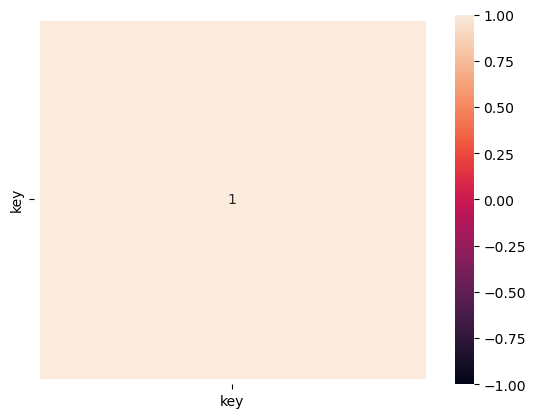

In [44]:
df_wire_t=pd.read_csv('C:\\Users\\naumo\\OneDrive\\Рабочий стол\\final_steel\\data_wire_time.csv')
fun_date(df_wire_t)

In [45]:
for d in df_bulk_t.columns:
    df_bulk_t[d]= pd.to_datetime(df_bulk_t[b], format='%Y-%m-%dT%H:%M:%S')
    print(d)
    print(df_bulk_t[d].min())
    print(df_bulk_t[d].max())

key
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 1
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 2
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 3
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 4
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 5
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 6
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 7
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 8
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 9
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 10
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 11
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 12
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 13
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 14
2019-05-03 11:03:52
2019-09-01 04:05:34
Bulk 15
2019-05-03 11:03:52
2019-09-01 04:05:34


Итак, поменяли типы данных в датах, существенных аномалий в датах не выявлено, все выглядит логично. Но тк время в нашей работе для анализа нам не нужно , производится анализ не временных рядов, данную таблицу далее использовать не будем.

**ВЫВОД: т.о., мы изучили данные, написали план работы, предобработали данные. Далее соединим их в 1 таблицу**

### Объединим все данные в одну таблицу

In [46]:
data = df_arc.merge(df_temp, how='inner', on = 'key').merge(
    df_bulk, how='inner', on = 'key').merge(df_gas, how='inner', on = 'key').merge(
    df_wire, how='inner', on = 'key')
data = data.fillna(0)
data=data.drop_duplicates(subset=['Работа'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2327
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   key                          2328 non-null   int64         
 1   Общая мощность               2328 non-null   float64       
 2   Работа                       2328 non-null   float64       
 3   Количество итераций нагрева  2328 non-null   float64       
 4   (Время замера, first)        2328 non-null   datetime64[ns]
 5   (Время замера, last)         2328 non-null   datetime64[ns]
 6   (Температура, first)         2328 non-null   float64       
 7   (Температура, last)          2328 non-null   float64       
 8   Bulk 1                       2328 non-null   float64       
 9   Bulk 2                       2328 non-null   float64       
 10  Bulk 3                       2328 non-null   float64       
 11  Bulk 4                       2328 non-null 

In [48]:
data['Работа'].nunique()

2328

In [49]:
data.columns

Index([                        'key',              'Общая мощность',
                            'Работа', 'Количество итераций нагрева',
           ('Время замера', 'first'),      ('Время замера', 'last'),
            ('Температура', 'first'),       ('Температура', 'last'),
                            'Bulk 1',                      'Bulk 2',
                            'Bulk 3',                      'Bulk 4',
                            'Bulk 5',                      'Bulk 6',
                            'Bulk 7',                      'Bulk 8',
                            'Bulk 9',                     'Bulk 10',
                           'Bulk 11',                     'Bulk 12',
                           'Bulk 13',                     'Bulk 14',
                           'Bulk 15',                       'Газ 1',
                            'Wire 1',                      'Wire 2',
                            'Wire 3',                      'Wire 4',
                            'Wire 

In [50]:
data.columns= [         'key',          
                        'Общая мощность','Работа', 'Количество итераций нагрева',
                        'time_1','time_2', 
                        'temp_1','temp_2',                  
                        'Bulk 1',
                        'Bulk 2',                  'Bulk 3',
                        'Bulk 4',                  'Bulk 5',
                        'Bulk 6',                  'Bulk 7',
                        'Bulk 8',                  'Bulk 9',
                       'Bulk 10',                 'Bulk 11',
                       'Bulk 12',                 'Bulk 13',
                       'Bulk 14',                 'Bulk 15',
                         'Газ 1',                  'Wire 1',
                        'Wire 2',                  'Wire 3',
                        'Wire 4',                  'Wire 6',
                        'Wire 7',                  'Wire 8',
                        'Wire 9']

In [51]:
data=data.query('temp_1>=1500')

In [52]:
data=data.drop(columns=['time_1','time_2', 'Общая мощность'], axis=1)

In [53]:
data.head(10)

,key,Работа,Количество итераций нагрева,temp_1,temp_2,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Bulk 15,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
0,1,1442.377754,5.0,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,...,154.0,29.749986,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,881.233565,4.0,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,...,154.0,12.555561,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,525.066777,5.0,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,...,153.0,28.554793,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,796.911309,4.0,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,...,154.0,18.841219,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1199.137958,4.0,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,...,152.0,5.413692,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0
5,6,1410.747219,4.0,1543.0,1596.0,0.0,0.0,0.0,117.0,0.0,...,154.0,11.273392,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0
6,7,729.780631,4.0,1586.0,1599.0,0.0,0.0,0.0,117.0,0.0,...,154.0,9.836267,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,8,1550.542227,4.0,1577.0,1598.0,0.0,0.0,0.0,99.0,0.0,...,153.0,15.171553,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,9,406.460647,5.0,1587.0,1592.0,0.0,0.0,0.0,117.0,0.0,...,203.0,8.216623,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0
9,10,617.361506,6.0,1574.0,1593.0,0.0,0.0,0.0,0.0,0.0,...,204.0,6.529891,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0


'**Общая информация датафрейма**'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2327
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   key                          2324 non-null   int64  
 1   Работа                       2324 non-null   float64
 2   Количество итераций нагрева  2324 non-null   float64
 3   temp_1                       2324 non-null   float64
 4   temp_2                       2324 non-null   float64
 5   Bulk 1                       2324 non-null   float64
 6   Bulk 2                       2324 non-null   float64
 7   Bulk 3                       2324 non-null   float64
 8   Bulk 4                       2324 non-null   float64
 9   Bulk 5                       2324 non-null   float64
 10  Bulk 6                       2324 non-null   float64
 11  Bulk 7                       2324 non-null   float64
 12  Bulk 8                       2324 non-null   float64
 13  Bulk 9            

None

'**Просмотр статистических данных**'

,key,Работа,Количество итераций нагрева,temp_1,temp_2,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Bulk 15,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,...,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,1251.140275,903.888406,4.696644,1587.368761,1593.372633,3.435026,1.425559,47.317126,37.347676,2.645869,...,120.078313,11.378854,102.423900,17.613213,3.241876,0.307209,0.980926,0.006374,0.311981,0.317795
std,715.027927,651.027171,1.606210,23.627590,11.207457,12.424463,19.102530,75.238050,58.677890,22.426054,...,84.655967,6.397008,43.540975,33.648176,27.972523,4.762842,8.702531,0.205926,4.407419,3.460248
min,1.000000,15.158096,1.000000,1519.000000,1541.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,628.750000,465.282483,4.000000,1571.000000,1587.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.282534,73.204559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1254.500000,767.950715,5.000000,1587.000000,1593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.000000,10.100687,101.103600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1867.250000,1166.456748,6.000000,1603.000000,1598.000000,0.000000,0.000000,80.000000,77.250000,0.000000,...,204.000000,14.218487,128.075222,23.102560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2499.000000,10630.980668,16.000000,1660.000000,1653.000000,185.000000,325.000000,454.000000,281.000000,603.000000,...,405.000000,77.995040,330.314424,282.780152,385.008668,113.231044,180.454575,8.490040,102.762401,62.025600


'**Вывод первых пяти строк датафрейма**'

,key,Работа,Количество итераций нагрева,temp_1,temp_2,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Bulk 15,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
0,1,1442.377754,5.0,1571.0,1613.0,0.0,0.0,0.0,43.0,0.0,...,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,881.233565,4.0,1581.0,1602.0,0.0,0.0,0.0,73.0,0.0,...,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,525.066777,5.0,1596.0,1599.0,0.0,0.0,0.0,34.0,0.0,...,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,796.911309,4.0,1601.0,1625.0,0.0,0.0,0.0,81.0,0.0,...,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1199.137958,4.0,1576.0,1602.0,0.0,0.0,0.0,78.0,0.0,...,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0


'**Вывод количесва дубликатов датафрейма**'

0

'**Вывод количесва пропущеных значений датафрейма**'

key                            0
Работа                         0
Количество итераций нагрева    0
temp_1                         0
temp_2                         0
Bulk 1                         0
Bulk 2                         0
Bulk 3                         0
Bulk 4                         0
Bulk 5                         0
Bulk 6                         0
Bulk 7                         0
Bulk 8                         0
Bulk 9                         0
Bulk 10                        0
Bulk 11                        0
Bulk 12                        0
Bulk 13                        0
Bulk 14                        0
Bulk 15                        0
Газ 1                          0
Wire 1                         0
Wire 2                         0
Wire 3                         0
Wire 4                         0
Wire 6                         0
Wire 7                         0
Wire 8                         0
Wire 9                         0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
key,2324.0,1251.140275,715.027927,1.000000,628.750000,1254.500000,1867.250000,2499.000000
Работа,2324.0,903.888406,651.027171,15.158096,465.282483,767.950715,1166.456748,10630.980668
Количество итераций нагрева,2324.0,4.696644,1.606210,1.000000,4.000000,5.000000,6.000000,16.000000
temp_1,2324.0,1587.368761,23.627590,1519.000000,1571.000000,1587.000000,1603.000000,1660.000000
temp_2,2324.0,1593.372633,11.207457,1541.000000,1587.000000,1593.000000,1598.000000,1653.000000
Bulk 1,2324.0,3.435026,12.424463,0.000000,0.000000,0.000000,0.000000,185.000000
Bulk 2,2324.0,1.425559,19.102530,0.000000,0.000000,0.000000,0.000000,325.000000
Bulk 3,2324.0,47.317126,75.238050,0.000000,0.000000,0.000000,80.000000,454.000000
Bulk 4,2324.0,37.347676,58.677890,0.000000,0.000000,0.000000,77.250000,281.000000
Bulk 5,2324.0,2.645869,22.426054,0.000000,0.000000,0.000000,0.000000,603.000000


'**Корреляция признаков**'

<AxesSubplot:>

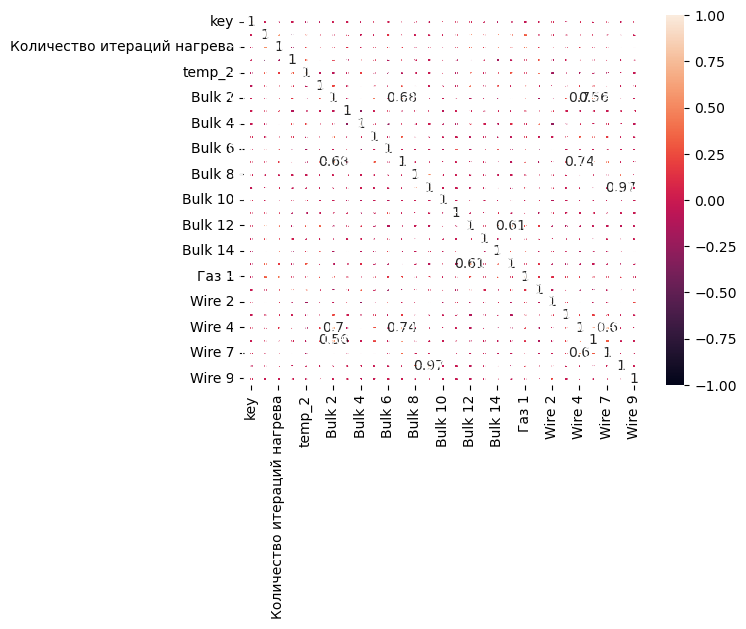

In [54]:
fun_date(data)

Т.о., готова итоговая таблица для обучения и определения признаков. Данные по столбцу "работа" уникальны, поэтому по нему удалены дубликаты. 

In [55]:
data=data.drop(columns=['key'], axis=1)

### Код решения

In [56]:
train, test = train_test_split(data, test_size=0.25, random_state=RND)

In [57]:
x_train, x_test = train.drop('temp_2', axis=1), test.drop('temp_2', axis=1)
y_train, y_test = train.temp_2 , test.temp_2

#### RandomForest

In [58]:
%%time

rf = RandomForestRegressor(random_state=RND)


params = {
    'max_depth': [5,10],
    'n_estimators': [20, 50,100],

}

grid_rf = GridSearchCV(rf,
                       params,
                       scoring='neg_mean_absolute_error',
                       cv = 3)

Wall time: 0 ns


In [59]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=250722),
             param_grid={'max_depth': [5, 10], 'n_estimators': [20, 50, 100]},
             scoring='neg_mean_absolute_error')

In [60]:
grid_rf.best_score_

-6.127342920823062

#### LGBMRegressor

In [61]:
%%time

gb = lgb.LGBMRegressor(random_state=RND)


params = {
    'max_depth': [5, 10, 15,20],
    'learning_rate': [0.01,  0.5, 1],
    'n_estimators': [100, 200, 300,350],
    
}

grid_gb = GridSearchCV(gb,
                       params,
                       scoring='neg_median_absolute_error',cv=6)
grid_gb.fit(x_train, y_train)

Wall time: 34.7 s


GridSearchCV(cv=6, estimator=LGBMRegressor(random_state=250722),
             param_grid={'learning_rate': [0.01, 0.5, 1],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 350]},
             scoring='neg_median_absolute_error')

In [62]:
grid_gb.best_score_

-4.533829060379806

#### LinearRegression

In [63]:
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [64]:
%%time

model_lr = LinearRegression()

print(cross_val_score(model_lr, x_train2, y_train, scoring='neg_mean_absolute_error').mean())


#grid_lr.fit(x_train2, y_train)

-6.721668966305481
Wall time: 16 ms


**ВЫВОД:  т.о. , на тренировочной выборке по метрике кросс-валидации лучше модель LGBMRegressor c минимальным по модулю best.score = -4,5**

### LGBMRegressor на тестовой выборке и лучшие параметры

In [65]:
predictions_gb = grid_gb.predict(x_test)
mae_gb_test = mae(y_test,predictions_gb)
print('Значение mae на тестовой выборке:', round(mae_gb_test, 3))

Значение mae на тестовой выборке: 6.482


In [66]:
grid_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 350}

**ВЫВОД:  
т.о. , на тестовой выборке по метрике  лучшая  модель LGBMRegressor с mae = 6,482  с learning_rate= 0.01, max_depth= 5, n_estimators= 350. Из признаков убрала Общую можность , тк имеет высокю корруляцию с  Работой, добавила признак Количество итераций нагрева из таблицы df_arc**

## ИТОГОВЫЕ ВЫВОДЫ. ОТЧЕТ ПО РЕШЕНИЮ

   **Итак, в ходе работы мы:**
1.	Определили цели и задачи работы, составили план.
2.	Изучили данные и предобработали их:
- изучили данные об электродах. Определили, что пропусков и дубликатов нет, корреляции между признаками нет. Изменили тип данных "Начало нагрева дугой" и "Конец нагрева дугой» на формат даты. Удалили выброc в реактивной мощности (весь номер партии с отрицательным значением мощности). Вместо столбцов "активная" и "реактивная" мощности, ввели 2 новых признака: Общая мощность (определяется как корень квадратов двух мощностей) и Работа (определяется как время нагрева дугой на общую мощность). Взяли среднее значение Общей мощности, а Работу суммировали для каждой партии. Поскольку Общая мощность и работа имеют высокую корреляцию (коэффициент корреляции 0,91), Общую мощность решено удалить для более качественного обучения моделей. Также посчитали количество интераций нагрева каждой партии.
- Изучили данные о подаче сыпучих материалов (объём). Видим пропуски в некоторых видах сыпучих материалов, их заполнили нулями, тк значит, что в данные партии те или иные сыпучие вещества не поступали.
- Изучили данные о подаче сыпучих материалов (время) и данные о проволочных материалах (время). Здесь поменяли типы данных в датах, существенных аномалий в датах не выявлено, все выглядит логично. Но тк время в нашей работе для анализа нам не нужно, производится анализ не временных рядов, данную таблицу далее использовали.
- Изучили данные о продувке сплава газом
- Изучили данные о результатах измерения температуры. Мы привели дату в корректный формат даты, пропуски Температуры удалили, т к корректному заполнению их не считается возможным. Посмотрели выбросы. Удалили данные по температуре ниже 1500 по согласованию с заказчиком. Согласно данным заказчика, удалять и корректировать их не нужно. Кроме того, согласно заданию, наш целевой признак -конечная температура, для обучения модели в качестве одного из признаков нам необходима первичная, поэтому мы сгруппировали данные соответствующим образом. Если замер был осуществлён только 1 раз, такие данные были удалены.
- Изучили данные о проволочных материалах (объём).  Были выявлены пропуски в связи с неиспользованием данных материалов, заполнили их нулями. Определили, что df_wire 5 использовался только 1 раз, считаем, что это аномалия, поэтому удалили df_wire. Значения пропусков заполним нулями. 
3.	Соединили все таблицы в одну с помощью inner объединения
4.	Определили признаки, которые будут использованы для обучения:
- 'Работа', 

- 'Количество итераций нагрева',

- 'temp_1',  

- 'Bulk 1','Bulk 2', 'Bulk 3''Bulk 4', ‘Bulk 5', 'Bulk 6','Bulk 7', -'Bulk 8''Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14','Bulk 15', 

- 'Газ 1', 

- 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 6','Wire 7', 'Wire 8', 'Wire 9'

Определили целевой признак rjytxyfz tvgthfnehf ('temp_2'). 

5.	Разделили выборку на тренировочную и тесовую (доля тестовой 0,25)
6.	 Используя возможности выбора гиперпараметров, обучили модели: RandomForestRegressor, CatBoostRegressor, LGBMRegressor, LinearRegression 
7.	определили лучшую модель на тренировочной выборке по метрике кросс-валидации.  Лучшей оказалась модель LGBMRegressor c минимальным по модулю best.score = -4,5
8.	Определили МАЕ на тестовой выборке лучшей модели LGBMRegressor : mae = 6,482 . Гиперпараметры лучшей модели learning_rate= 0.01, max_depth= 5, n_estimators= 350.
9.	Подготовили исследовательский анализ и сводный вывод по получившимся результатам.


**ОТВЕТЫ НА ВОПРОСЫ:**

- Согласно плану, были выполнены все пункты. В ходе работы было решено отказаться от таблиц «данные о подаче сыпучих материалов (время)» и «данные о проволочных материалах (время)», так как они не влияют на целевой признак. Кроме того, было решено добавить модель для обучения LGBMRegressor. Она оказалась лучшей. 
- Основные трудности возникли в связи с непониманием значений показателей внутри таблиц, какую роль они оказывают на остальные показатели, в тч на целевой признак. Понимание возникло после просмотренного вебинара с разбором данных, а также в процессе детального анализа каждой таблицы.
- ключевые шаги для решения задачи: просмотр, анализ и предобработка данных, обучение нескольких моделей, определение лучшей модели 

Рассмотрим относительную важность признаков лучшей модели LGBMRegressor на тестовой выборке. Считаем , что в рамках нашей задачи данный пукт необходим и будет полезен для производственных и экономических решений  ООО «Так закаляем сталь» 

Text(0.5, 0, 'Относительная важность')

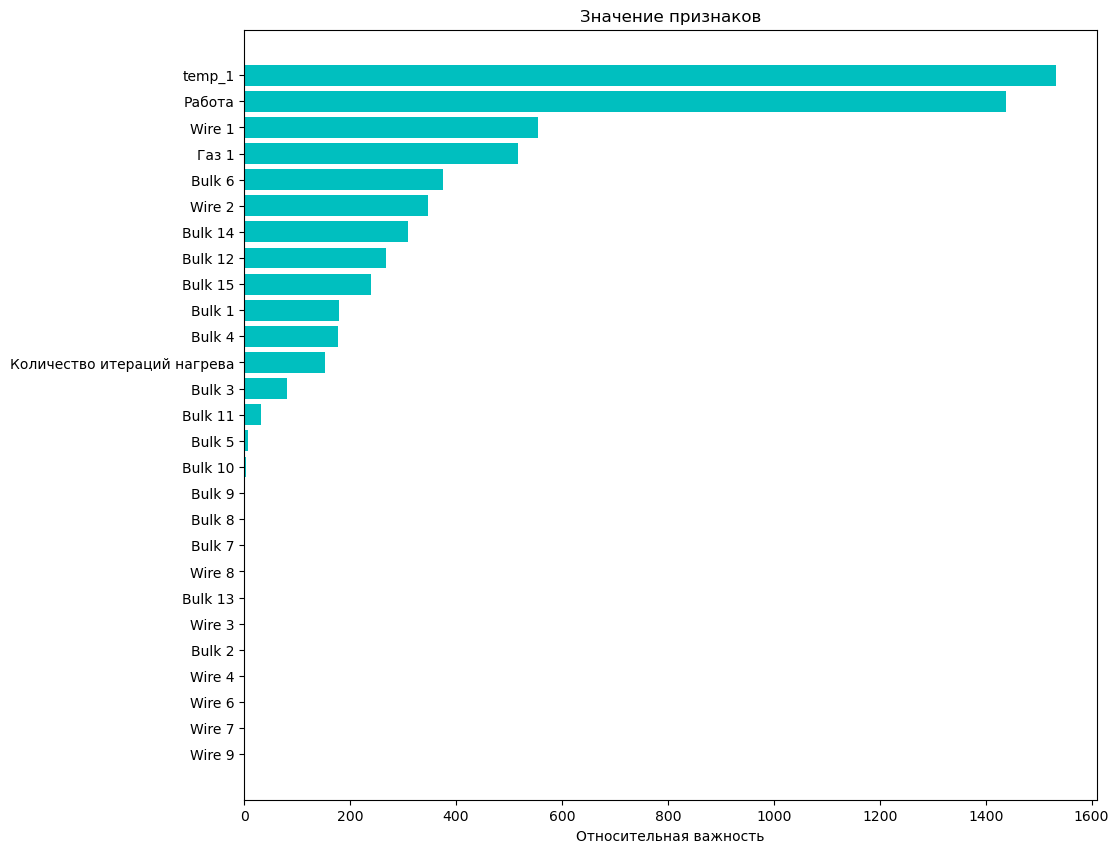

In [67]:
features = x_test.columns
importances = grid_gb.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(11, 10))
plt.title('Значение признаков')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')

Согласно графику относительной важности, наиболее важными параметрами для определения целевого признака конечной температуры (Temp2) являются:
1.	Первоначальная температура замера
2.	Работа
3.	Wire 1
4.	Газ 1
5.	Bulk 6
Именно этим параметрам в первую очередь необходимо уделять особое внимание, чтобы управлять конечной температурой и тем самым оптимизировать производственные расходы.

**Итак, по итогу работу мы достигли поставленной цели, а именно: Построили модель, которая предскажет температуру стали металлургического комбината ООО «Так закаляем сталь» для оптимизации производственных расходов.**